<a href="https://colab.research.google.com/github/ShannonH98/PyTorch_Practice_Projects/blob/main/Feature_Engineering_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

%matplotlib inline

In [ ]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
df['occupation'].describe()

,occupation
count,32561
unique,15
top,Prof-specialty
freq,4140


In [ ]:
print(len(df))

32561


In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [ ]:
cat_cols = ['sex', 'education', 'marital.status', 'workclass', 'occupation']
cont_cols = ['age', 'hours.per.week']

#no label column present so i will just use the salary column
y_col = ['income']

In [ ]:
cat_cols, cont_cols, y_col

(['sex', 'education', 'marital.status', 'workclass', 'occupation'],
 ['age', 'hours.per.week'],
 ['income'])

In [ ]:
print(f'cat_cols: {len(cat_cols)}')
print(f'cont_cols: {len(cont_cols)}')
print(f'y_col: {len(y_col)}')

cat_cols: 5
cont_cols: 2
y_col: 1


In [ ]:
print(df['sex'].unique())
print(df['education'].unique())
print(df['marital.status'].unique())
print(df['workclass'].unique())
print(df['occupation'].unique())

['Female' 'Male']
['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']
['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']


In [ ]:
print(df['age'].unique)
print(df['hours.per.week'].unique)

<bound method Series.unique of 0        90
1        82
2        66
3        54
4        41
         ..
32556    22
32557    27
32558    40
32559    58
32560    22
Name: age, Length: 32561, dtype: int64>
<bound method Series.unique of 0        40
1        18
2        40
3        40
4        40
         ..
32556    40
32557    38
32558    40
32559    40
32560    20
Name: hours.per.week, Length: 32561, dtype: int64>


In [ ]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [ ]:
df = shuffle(df, random_state=42).reset_index(drop=True)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,29,Private,280618,Some-college,10,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
1,19,Private,439779,Some-college,10,Never-married,Sales,Own-child,White,Male,0,0,15,United-States,<=50K
2,28,Private,204734,Some-college,10,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,40,United-States,<=50K
3,35,Private,107991,11th,7,Never-married,Sales,Not-in-family,White,Male,0,0,45,United-States,<=50K
4,20,Private,54152,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,?,<=50K


In [ ]:
cat_sizes = [len(df[col].cat.categories) for col in cat_cols]
emb_sizes = [(size, min(50, (size+1)//2)) for size in cat_sizes]
emb_sizes


[(2, 1), (16, 8), (7, 4), (9, 5), (15, 8)]

In [ ]:
sx = df['sex'].cat.codes.values
ed = df['education'].cat.codes.values
ms = df['marital.status'].cat.codes.values
wc = df['workclass'].cat.codes.values
oc = df['occupation'].cat.codes.values



In [ ]:
cats = torch.tensor(
    np.stack([df[col].cat.codes.values for col in cat_cols], axis=1),
    dtype=torch.int64
)

conts = torch.tensor(
    np.stack([df[col].values for col in cont_cols], axis=1),
    dtype=torch.float
)

In [ ]:
cats[:5]


tensor([[ 1, 15,  2,  4,  6],
        [ 1, 15,  4,  4, 12],
        [ 0, 15,  2,  4, 13],
        [ 1,  1,  4,  4, 12],
        [ 0, 15,  4,  4,  1]])

In [ ]:
conts[:5]

tensor([[29., 40.],
        [19., 15.],
        [28., 40.],
        [35., 45.],
        [20., 30.]])

In [ ]:
y = torch.tensor(
    (df[y_col].values == '>50K').astype(np.int64)
)
#This performs element-wise comparison - so above or below 50k

In [ ]:
y

tensor([[0],
        [0],
        [0],
        ...,
        [1],
        [1],
        [0]])

In [ ]:
b = 30000 #suggested batch size
t = 5000 #suggested test size

cat_train, cat_test = cats[:b-t], cats[b-t:b]
cont_train, cont_test = conts[:b-t], conts[b-t:b]
y_train, y_test = y[:b-t], y[b-t:b]


In [ ]:
class TabularModel(nn.Module):
    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont

        for i in layers:
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1], out_sz))
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont):
        embeddings = [e(x_cat[:, i]) for i, e in enumerate(self.embeds)]
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        return self.layers(x)

In [ ]:
torch.manual_seed(42)

In [ ]:
model = TabularModel(emb_sizes, conts.shape[1], 2, [50], p=0.4)

In [ ]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(2, 1)
    (1): Embedding(16, 8)
    (2): Embedding(7, 4)
    (3): Embedding(9, 5)
    (4): Embedding(15, 8)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(2, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=28, out_features=50, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=50, out_features=2, bias=True)
  )
)

In [ ]:
torch.manual_seed(42)
model = TabularModel(emb_sizes, conts.shape[1], 2, [50], p=0.4)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
import time
import torch
import torch.nn as nn
import torch.optim as optim

# Ensure targets are 1D long tensors
y_train = y_train.view(-1).long()
y_test  = y_test.view(-1).long()

# Training loop
epochs = 300
losses = []
test_accuracies = []

start_time = time.time()

for epoch in range(1, epochs + 1):
    model.train()  # set model to training mode

    # Forward pass
    y_pred = model(cat_train, cont_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Store loss
    losses.append(loss.item())

    # Print every 25 epochs
    if epoch % 25 == 1:
        print(f'Epoch {epoch:3} | Loss: {loss.item():10.6f}')

# Final loss
print(f'\nFinal Epoch {epochs:3} | Loss: {loss.item():10.6f}')
print(f'Training time: {(time.time() - start_time)/60:.2f} minutes')

# Evaluation on test set
model.eval()  # set model to evaluation mode
with torch.no_grad():
    y_val_logits = model(cat_test, cont_test)


Epoch   1 | Loss:   0.760750
Epoch  26 | Loss:   0.633290
Epoch  51 | Loss:   0.576296
Epoch  76 | Loss:   0.533852
Epoch 101 | Loss:   0.495182
Epoch 126 | Loss:   0.468353
Epoch 151 | Loss:   0.445655
Epoch 176 | Loss:   0.427792
Epoch 201 | Loss:   0.417056
Epoch 226 | Loss:   0.409950
Epoch 251 | Loss:   0.403544
Epoch 276 | Loss:   0.394461

Final Epoch 300 | Loss:   0.387605
Training time: 0.41 minutes


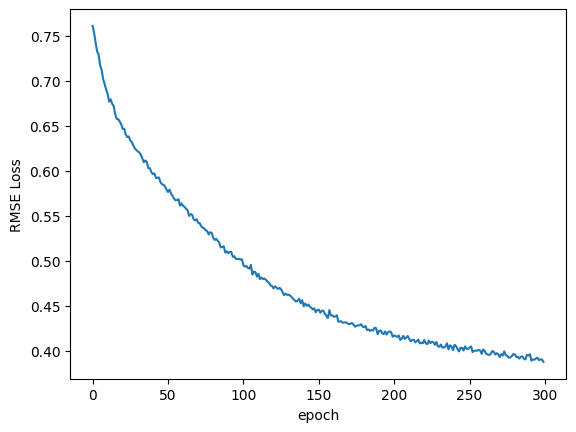

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [ ]:
with torch.no_grad():
    y_val = model(cat_test, cont_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 0.59893340


In [ ]:
with torch.no_grad():
    # Get raw logits from the model
    y_val_logits = model(cat_test, cont_test)  # shape: (N, 2)

    # Convert logits to predicted class: 0 or 1
    y_val = torch.argmax(y_val_logits, dim=1)

    probs = torch.softmax(y_val_logits, dim=1)[:, 1]  # probability of '>50K'

# Print first 50 predictions vs actual
print(f'{"PREDICTED":>10} {"ACTUAL":>8} {"CORRECT":>8} {"PROB":>8}')
for i in range(50):
    pred = y_val[i].item()
    actual = y_test[i].item()
    correct = int(pred == actual)
    prob = probs[i].item()
    print(f'{pred:10} {actual:8} {correct:8} {prob:8.4f}')

# Compute overall accuracy
accuracy = (y_val == y_test).float().mean()
print(f'Test Accuracy: {accuracy*100:.2f}%')


 PREDICTED   ACTUAL  CORRECT     PROB
         0        0        1   0.1858
         0        0        1   0.2013
         0        0        1   0.0411
         0        0        1   0.2750
         0        0        1   0.0230
         0        0        1   0.1259
         1        0        0   0.7818
         0        0        1   0.0968
         0        0        1   0.0439
         1        1        1   0.7626
         0        1        0   0.4515
         0        1        0   0.4035
         0        0        1   0.4909
         0        0        1   0.1448
         0        0        1   0.3033
         0        0        1   0.0787
         1        1        1   0.5062
         0        0        1   0.0060
         0        0        1   0.0166
         0        0        1   0.0152
         0        0        1   0.4748
         1        1        1   0.8219
         0        0        1   0.0242
         0        0        1   0.1198
         0        0        1   0.4189
         0  